<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display, Latex



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [22]:
# Cargar los datos del cuarteto de Anscombe
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [38]:
df['dataset'].value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

In [47]:
#Primero separemos cada grupo.
G1= df[df['dataset']=='I'].drop('dataset',axis=1)
G2= df[df['dataset']=='II'].drop('dataset',axis=1)
G3 = df[df['dataset']=='III'].drop('dataset',axis=1)
G4 = df[df['dataset']=='IV'].drop('dataset',axis=1)


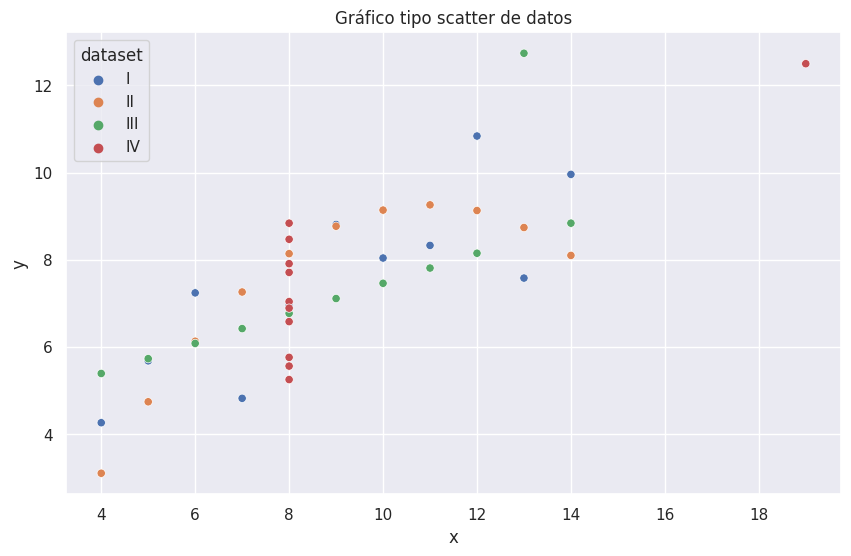

In [49]:
#Grafiquemos primero todo junto:
plt.figure(figsize=(10, 6)) #se utiliza el código usual para el gráfico
sns.scatterplot(
    x='x',
    y='y',
    hue='dataset', #se hace una leyenda por cada grupo
    data=df, #se usa el df como la información

)
plt.title('Gráfico tipo scatter de datos')
plt.show()

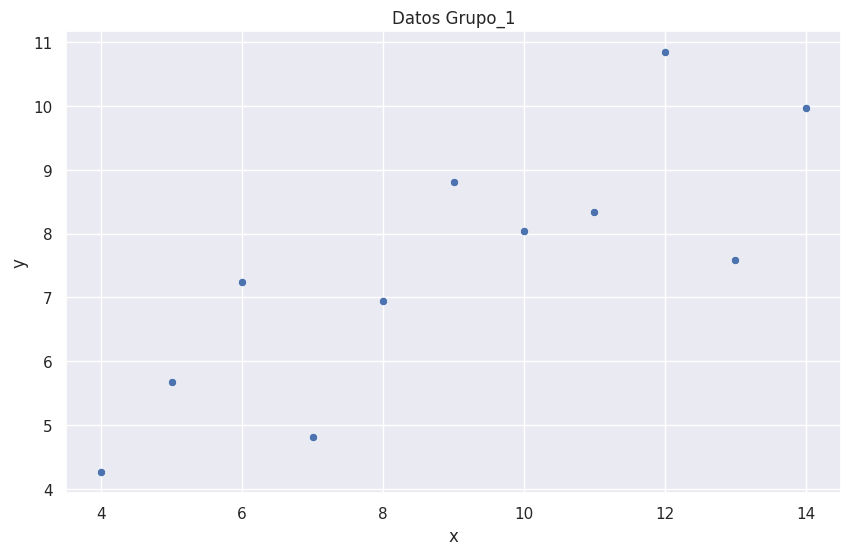

In [51]:
plt.figure(figsize=(10, 6)) #se utiliza el código usual para el gráfico
sns.scatterplot(
    x='x',
    y='y',
    data = G1, #se usa el G1 como la información
)
plt.title('Datos Grupo_1')
plt.show()

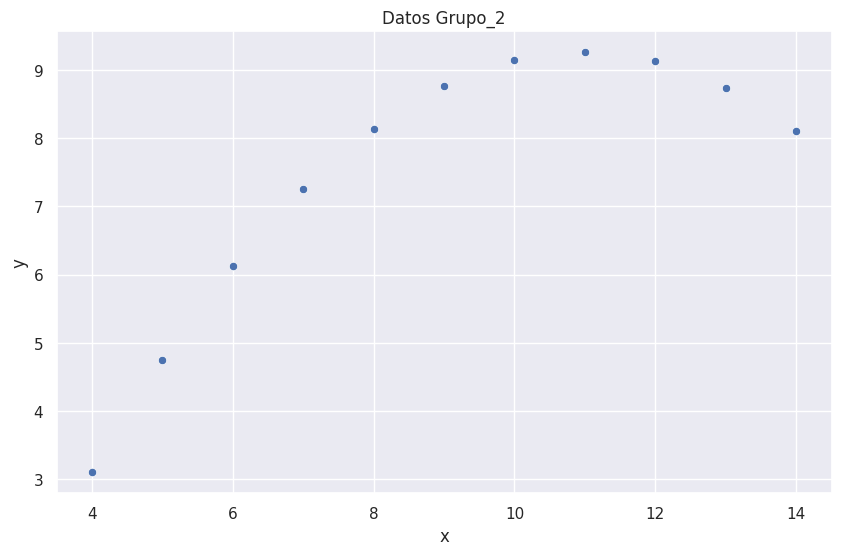

In [52]:
plt.figure(figsize=(10, 6)) #se utiliza el código usual para el gráfico
sns.scatterplot(
    x='x',
    y='y',
    data= G2, #se usa el G2 como la información
)
plt.title('Datos Grupo_2')
plt.show()

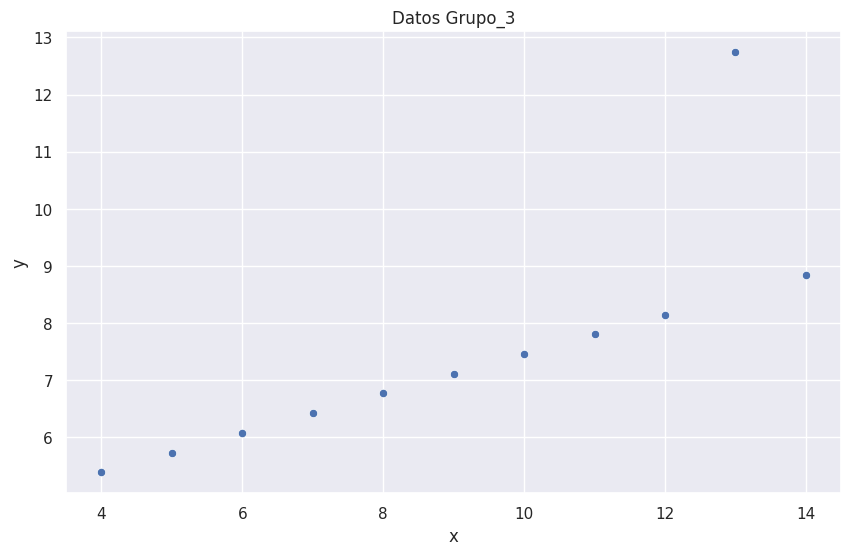

In [53]:
plt.figure(figsize=(10, 6)) #se utiliza el código usual para el gráfico
sns.scatterplot(
    x='x',
    y='y',
    data= G3, #se usa el G3 como la información
)
plt.title('Datos Grupo_3')
plt.show()

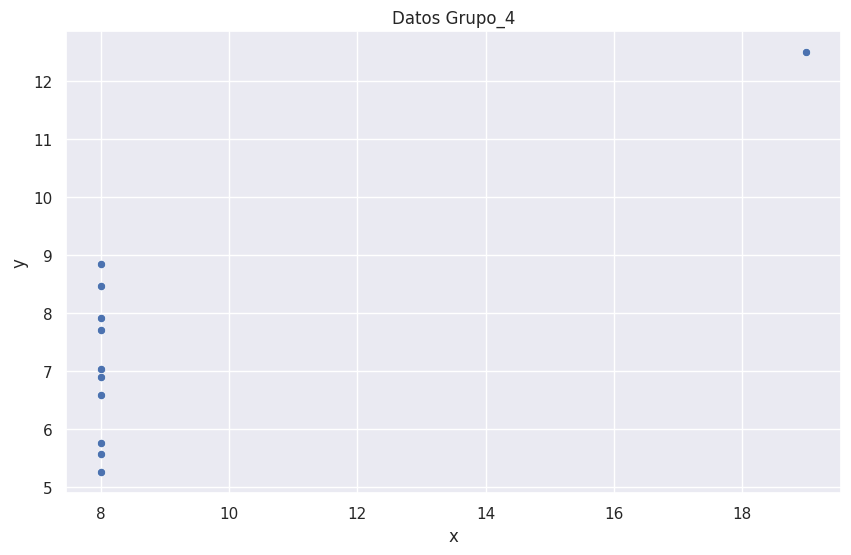

In [54]:
plt.figure(figsize=(10, 6)) #se utiliza el código usual para el gráfico
sns.scatterplot(
    x='x',
    y='y',
    data= G4, #se usa el G4 como la información
)
plt.title('Datos Grupo_4')
plt.show()

A simple vista, los grupos sí son muy distintos entre sí. Se puede notar que el grupo_2 sigue algo parecido a una parábola, el grupo_3 se parece a una recta, el grupo_4 está muy concentrado en una línea, y el grupo_1 está muy disperso.

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [55]:
#Utilizando los grupos por separados, podemos, inmediatamente, describir los grupos:
G1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [56]:
G2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [57]:
G3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [58]:
G4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000



Se observa que, a pesar de lo distintos que son los grupos, tienen datos, como la media y la desviación estándar, en común.

3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

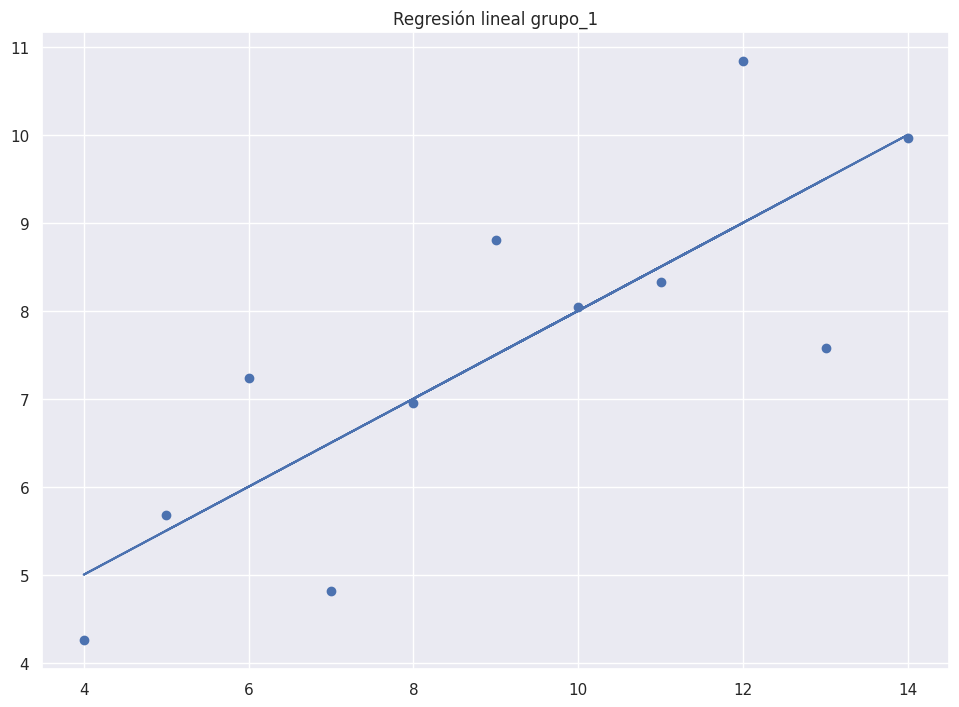

In [59]:
import matplotlib.pyplot as plt
from scipy import stats

def myfunc(x): #creamos una función que crea el ajuste lineal
  return slope * x + intercept

#Usamos un reajuste de regresión lineal
x1= G1['x']
y1 = G1['y']

slope, intercept, r, p, std_err = stats.linregress(x1, y1)

mymodel1 = list(map(myfunc, x1))

plt.scatter(x1, y1) #ploteamos los puntos
plt.plot(x1, mymodel1) #ploteamos la regresión
plt.title('Regresión lineal grupo_1')
plt.show()

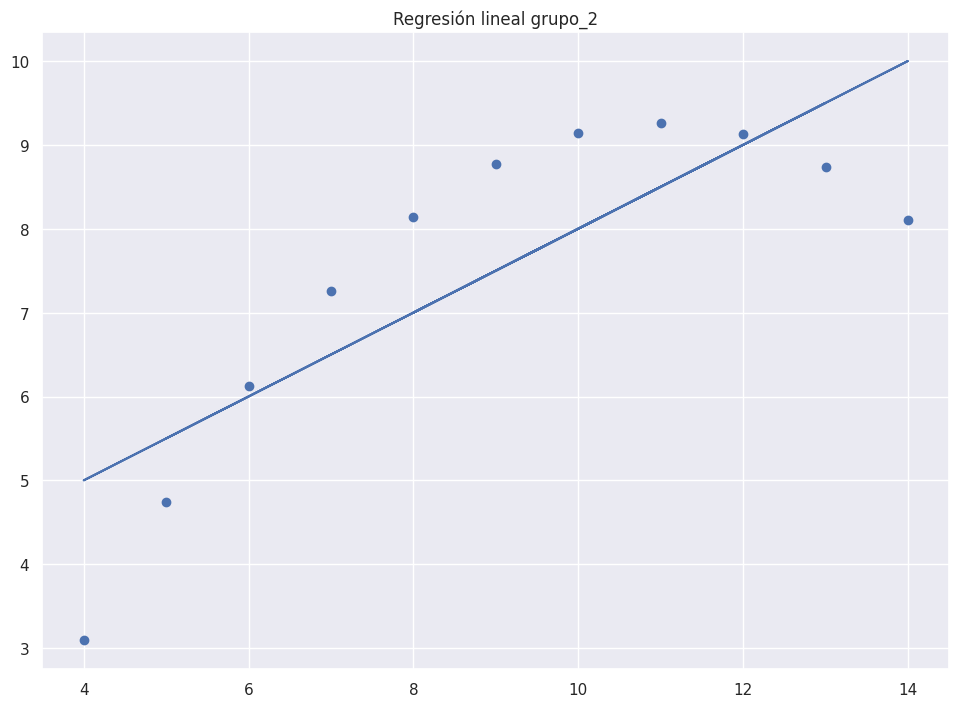

In [60]:
#Usamos un reajuste de regresión lineal
x2= G2['x']
y2 = G2['y']

slope, intercept, r, p, std_err = stats.linregress(x2, y2)

mymodel2 = list(map(myfunc, x2))

plt.scatter(x2, y2)
plt.plot(x2, mymodel2)
plt.title('Regresión lineal grupo_2')
plt.show()

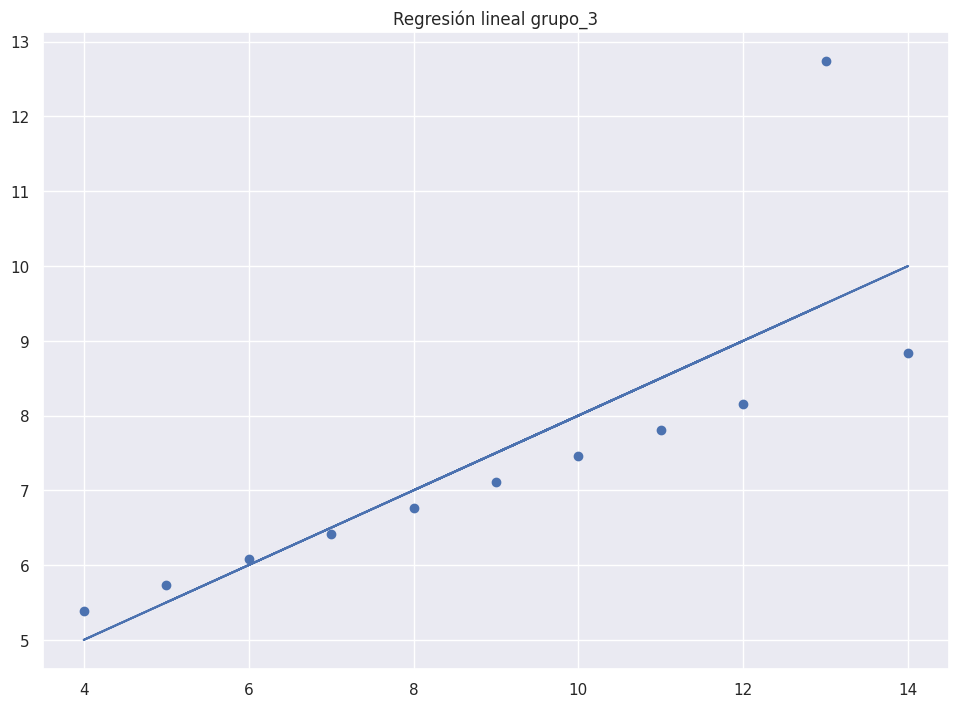

In [61]:
#Usamos un reajuste de regresión lineal
x3= G3['x']
y3 = G3['y']

slope, intercept, r, p, std_err = stats.linregress(x3, y3)

mymodel3 = list(map(myfunc, x3))

plt.scatter(x3, y3)
plt.plot(x3, mymodel3)
plt.title('Regresión lineal grupo_3')
plt.show()

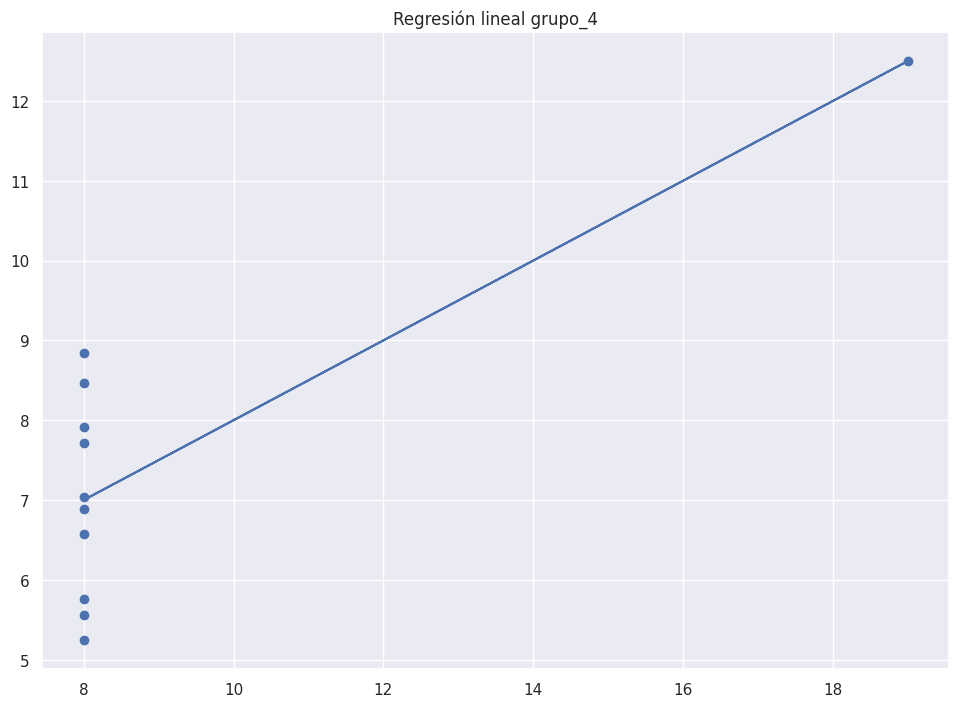

In [62]:
#Usamos un reajuste de regresión lineal
x4 = G4['x']
y4 = G4['y']

slope, intercept, r, p, std_err = stats.linregress(x4, y4)

mymodel4 = list(map(myfunc, x4))

plt.scatter(x4, y4)
plt.plot(x4, mymodel4)
plt.title('Regresión lineal grupo_4')
plt.show()

Notar que la aplicación de el ajuste lineal no produce resultados favorables en los gráficos 1, 2 y 4. En cuanto al gráfico 3, aunque muestra similitudes, la presencia de cierta dispersión en algunos datos lo hace menos confiable.

4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

Solución:

Haremos un reajuste para el grupo 2 y grupo 3; el grupo 1 tiene datos muy aleatorios, y el grupo 4 tiene datos muy juntos en un solo punto de el eje x.

Pero antes definamos una función rsquared el cual corresponderá al coeficiente de determinación, el cual se utiliza para medir la precisión de un modelo dado.

In [78]:
def rsquared(y, yhat) -> float:
    """
    Calculo del r-cuadrado
    """
    # agregar codigo
    metrica = 0

    sum_y=sum(y)
    n=len(y)
    prom_y=sum_y/n

    SSreg=sum((yhat-prom_y)**2)
    SSres=sum((y-yhat)**2)
    SStot=SSres+SSreg

    metrica = SSreg/SStot

    return metrica

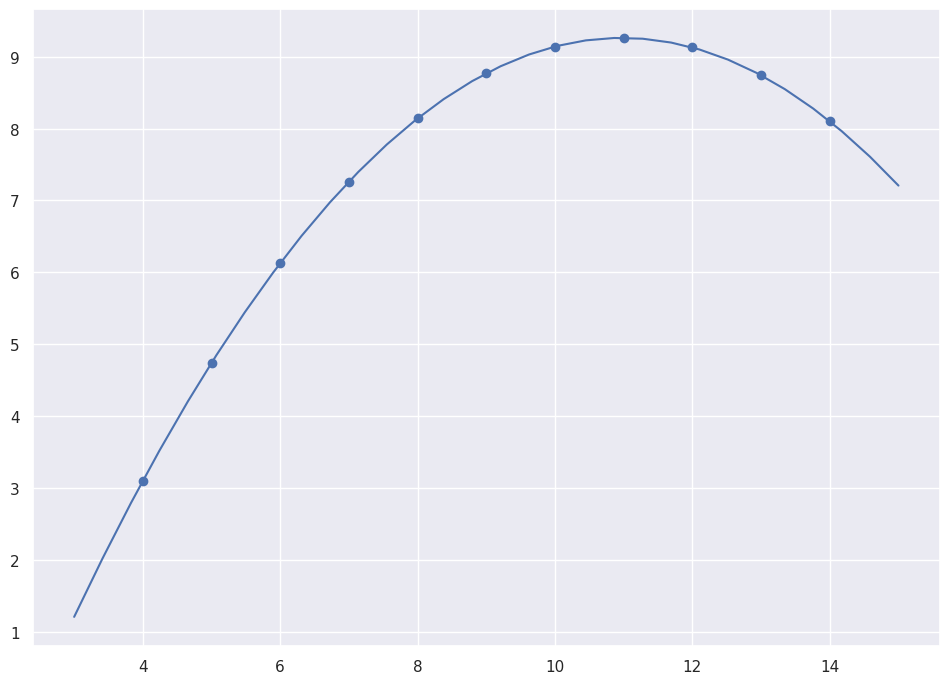

0.999999457857722

In [76]:
#Podemos crear un ajuste polinomico para el grupo 2
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x=G2['x'] #fijamos el eje x
y=G2['y'] #fijamos el eje
line = np.linspace(3,15,30)
polymodel = np.poly1d(np.polyfit(x, y, 2)) #reajustamos el modelo con un polinomio de grado 2

plt.scatter(x, y) #graficamos los puntos
plt.plot(line, polymodel(line)) #graficamos el polinomio
plt.show()

rsquared(np.array(y), np.array(polymodel(x))) #además, podemos ver el r^2 para el reajuste

Dado que el R^2 es muy cercano a 1 esto significa que el modelo predice de manera casi perfecta los valores.

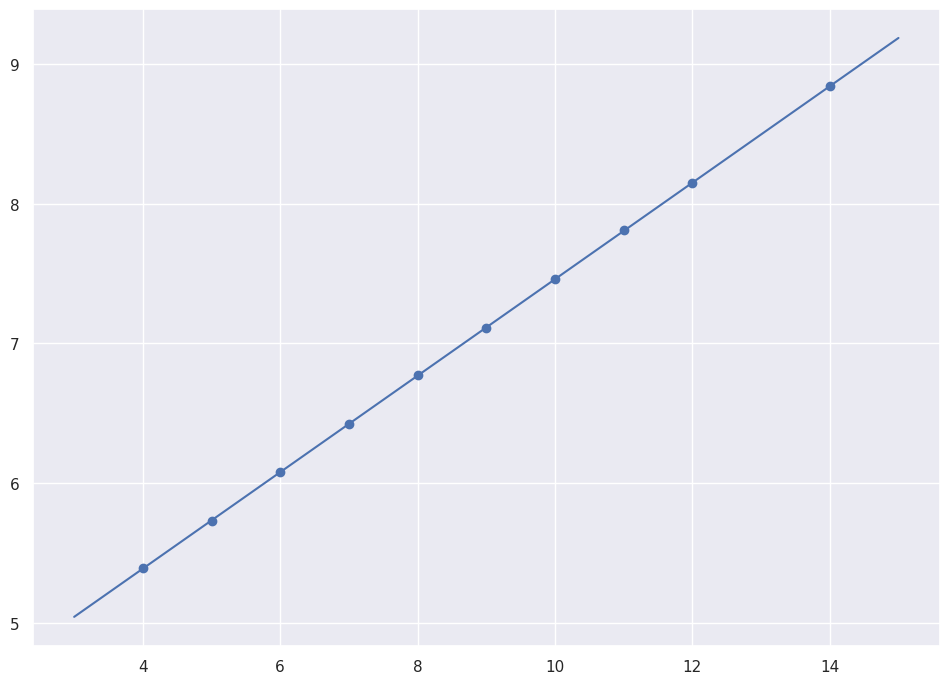

0.9999931075815331

In [77]:
#Podemos quitar un dato al grupo 3
NewG3 = G3.drop(24) #Quitamos el dato
x = NewG3["x"]
y = NewG3["y"]
linearmodel = np.poly1d(np.polyfit(x, y, 1)) #creamos un reajuste polinomial de grado 1
line = np.linspace(3,15,30)
plt.scatter(x, y)
plt.plot(line, linearmodel(line))
plt.show()

rsquared(np.array(y), np.array(linearmodel(x))) #además, podemos ver el r^2 para el reajuste

Nuevamente, como el R^2 es muy cercano a 1 esto significa que el modelo predice de manera casi perfecta los valores.